# Problem Statement - I
### Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.


## Problem Statement - II
### Results Expected by Learners
Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

#### Hint: 
Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

Identify if there is data imbalance in the data. Find the ratio of data imbalance.

#### Hint: 
How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

#### Hint: 
Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

In [501]:
# Install dependencies
# !pip install numpy pandas seaborn matplotlib
%pip install numpy pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [502]:
# Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading CSV files

In [503]:
new_df_data = pd.read_csv('application_data.csv')
old_df_data = pd.read_csv('previous_application.csv')

### Inspecting inside new_df_data 

In [504]:
new_df_data.shape

(307511, 122)

In [505]:
# Notebook settting to display all the row and counter
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [506]:
new_df_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [507]:
new_df_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [508]:
new_df_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data Cleaning

In [509]:
# Checking columns
new_df_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [510]:
new_df_data.loc[:,"EXT_SOURCE_1":"DEF_60_CNT_SOCIAL_CIRCLE"].columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERI

In [511]:
new_df_data.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

In [512]:
new_df_data.loc[:, "FLAG_MOBIL":"FLAG_EMAIL"].columns

Index(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype='object')

In [513]:
new_df_data[['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' ]].columns

Index(['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], dtype='object')

#### Removing redundant columns that do not contribute to our analysis.

In [514]:
# Dropping insignificant columns from the analysis.
new_df_data.drop(new_df_data.loc[:,"EXT_SOURCE_1":"DEF_60_CNT_SOCIAL_CIRCLE"].columns, axis=1, inplace=True)
new_df_data.drop(new_df_data.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns,axis=1,inplace=True)
new_df_data.drop(new_df_data.loc[:, "FLAG_MOBIL": "FLAG_EMAIL"].columns,axis=1,inplace=True)
new_df_data.drop(["NAME_TYPE_SUITE", "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True)

In [515]:
# Checking after dropping
new_df_data.shape

(307511, 39)

In [516]:
# Calculating the % of missing values in each column.
missing_values = (new_df_data.isnull().sum()/new_df_data.shape[0])*100
missing_values[missing_values>0].sort_values(ascending=False)

OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
dtype: float64

### Handling missing values

#### Occupation column

In [517]:
new_df_data[new_df_data["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [518]:
new_df_data["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [519]:
new_df_data["NAME_INCOME_TYPE"].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [520]:
# Filling in the null values in the occupation column by referencing the income type for individuals classified as pensioners or unemployed.
new_df_data.loc[((new_df_data["NAME_INCOME_TYPE"] == "Pensioner") & (new_df_data["OCCUPATION_TYPE"].isna() == True)), "OCCUPATION_TYPE"] = "Pensioner"

new_df_data.loc[((new_df_data["NAME_INCOME_TYPE"] == "Unemployed") & (new_df_data["OCCUPATION_TYPE"].isna() == True)), "OCCUPATION_TYPE"] = "Unemployed"

In [521]:
new_df_data["OCCUPATION_TYPE"].isnull().sum()

41012

In [522]:
new_df_data["OCCUPATION_TYPE"].mode()

0    Pensioner
Name: OCCUPATION_TYPE, dtype: object

In [523]:
# Filling in the remaining null values in the occupation column by replacing them with the mode (most frequent value) of the occupation column.
new_df_data["OCCUPATION_TYPE"].fillna(new_df_data["OCCUPATION_TYPE"].mode()[0], inplace=True)

In [524]:
# Checking
new_df_data["OCCUPATION_TYPE"].isnull().sum()

0

In [525]:
new_df_data["OCCUPATION_TYPE"].value_counts()

Pensioner                96369
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Unemployed                  22
Name: OCCUPATION_TYPE, dtype: int64

### AMT_REQ_CREDIT_BUREAU_HOUR to AMT_REQ_CREDIT_BUREAU_YEAR columns 

In [526]:
new_df_data.shape

(307511, 39)

In [527]:
new_df_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR": "AMT_REQ_CREDIT_BUREAU_YEAR"].columns

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [528]:
new_df_data.drop(new_df_data.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR": "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1, inplace=True)

In [529]:
new_df_data.shape

(307511, 33)

### AMT_GOODS_PRICE column

In [530]:
new_df_data[new_df_data["AMT_GOODS_PRICE"].isnull()]["NAME_CONTRACT_TYPE"].value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

In [531]:
# Dividing the data frame into two separate subsets based on the contract type: Cash loans and Revolving loans.
new_df_data_cashloan = new_df_data[new_df_data["NAME_CONTRACT_TYPE"] == "Cash loans"]
new_df_data_revloan = new_df_data[new_df_data["NAME_CONTRACT_TYPE"] == "Revolving loans"]
new_df_data_revloan["AMT_GOODS_PRICE"].median()

270000.0

In [532]:
# Since a significant portion of the missing values in the AMT_GOODS_PRICE column correspond to clients with a 
# contract type of "Revolving loans," the missing values will be imputed using the median value of the goods price for this specific contract type.
new_df_data["AMT_GOODS_PRICE"]=new_df_data["AMT_GOODS_PRICE"].fillna(new_df_data["AMT_GOODS_PRICE"].median())

In [533]:
#sanity check
new_df_data["AMT_GOODS_PRICE"].isnull().sum()

0

#### AMT_ANNUITY column


In [534]:
new_df_data["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [535]:
# All the null values in the ANNUITY column are exclusively associated with the Cash loan contract type.
new_df_data[new_df_data["AMT_ANNUITY"].isnull()]["NAME_CONTRACT_TYPE"]

47531     Cash loans
50035     Cash loans
51594     Cash loans
55025     Cash loans
59934     Cash loans
75873     Cash loans
89343     Cash loans
123872    Cash loans
207186    Cash loans
227939    Cash loans
239329    Cash loans
241835    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

In [536]:
new_df_data_cashloan["AMT_ANNUITY"].median()

26086.5

In [537]:
# Since all the missing values in the ANNUITY column pertain to the Cash loan contract type, we will fill them with the median value derived from the existing data points within the Cash loan category.
new_df_data["AMT_ANNUITY"]=new_df_data["AMT_ANNUITY"].fillna(new_df_data_cashloan["AMT_ANNUITY"].median())

In [538]:
#sanity check
new_df_data["AMT_ANNUITY"].isnull().sum()

0

In [539]:
#sanity check
new_df_data.isnull().sum().sort_values(ascending=False)

OWN_CAR_AGE                    202929
SK_ID_CURR                          0
DAYS_EMPLOYED                       0
LIVE_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
REG_REGION_NOT_LIVE_REGION          0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
OCCUPATION_TYPE                     0
DAYS_ID_PUBLISH                     0
DAYS_REGISTRATION                   0
DAYS_BIRTH                          0
TARGET                              0
REGION_POPULATION_RELATIVE          0
NAME_HOUSING_TYPE                   0
NAME_FAMILY_STATUS                  0
NAME_EDUCATION_TYPE                 0
NAME_INCOME_TYPE                    0
AMT_GOODS_PRICE                     0
AMT_ANNUITY                         0
AMT_CREDIT                          0
AMT_INCOME_T

#### CODE_GENDER column


In [540]:
new_df_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [541]:
# Replacing the 'XNA' values in the gender column with the mode (most frequent value) of the gender column.
new_df_data["CODE_GENDER"].replace(["XNA"],[new_df_data["CODE_GENDER"].mode()],inplace=True)

In [542]:
new_df_data["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### DAYS_BIRTH column

In [543]:
new_df_data['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [544]:
# Converting negative values to their absolute values.
new_df_data['DAYS_BIRTH']=new_df_data['DAYS_BIRTH'].abs()

In [545]:
# Converting the number of days into years and creating a new column called "age" based on this conversion.
new_df_data['AGE']=(new_df_data['DAYS_BIRTH']/365).astype(int)

In [546]:
# sanity check
new_df_data['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [547]:
# dropping DAYS_BIRTH column
new_df_data.drop("DAYS_BIRTH",axis=1,inplace=True)

In [548]:
# Binning age into age group "<30", '30-40', '40-50', '50-60','60+'
new_df_data["AGE_GROUP"]=pd.cut(new_df_data['AGE'],bins=[0,30,40,50,60,1000],labels=["<30", "30-40", "40-50", "50-60","60+"])

In [549]:
new_df_data["AGE_GROUP"].value_counts()

30-40    83117
40-50    74401
50-60    67819
<30      52806
60+      29368
Name: AGE_GROUP, dtype: int64

In [550]:
# Dropping AGE column
new_df_data.drop("AGE",axis=1,inplace=True)

In [551]:
# Sanity check
new_df_data.shape

(307511, 33)

#### OCCUPATION_TYPE column


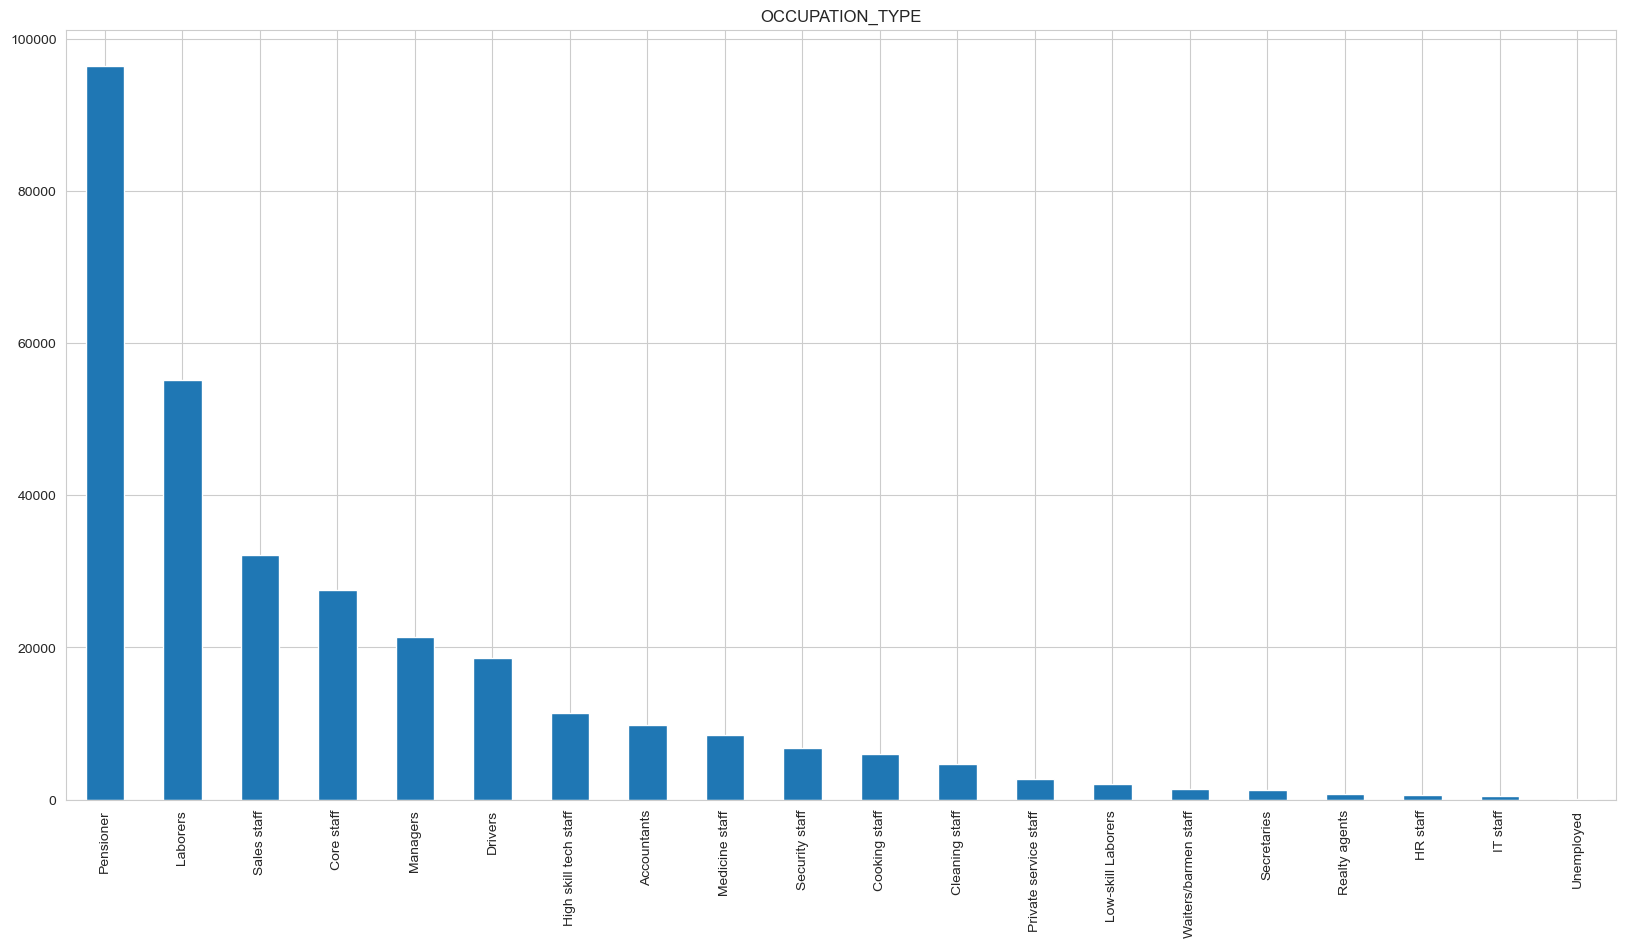

In [552]:
plt.figure(figsize=[20,10])
plt.title("OCCUPATION_TYPE")
new_df_data["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.show()

##### Observation:
- The largest portion of the population is composed of laborers, sales staff, and core staff, while the presence of IT staff is relatively lower.


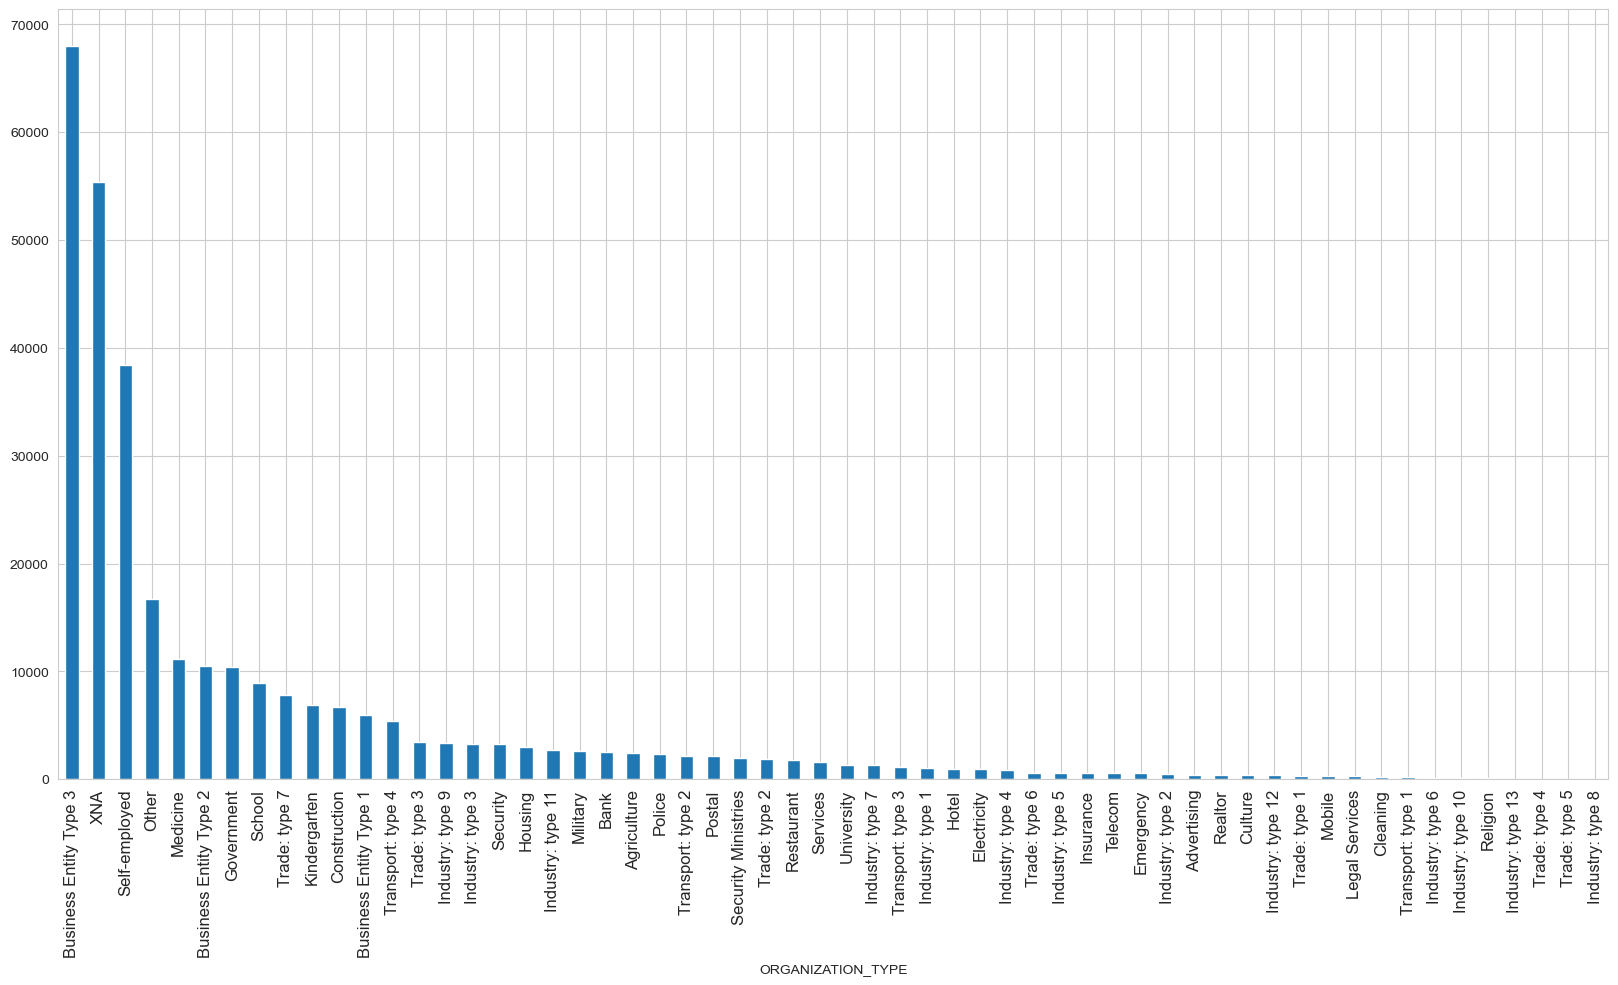

In [553]:
plt.figure(figsize=[20,10])
new_df_data["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.xlabel("ORGANIZATION_TYPE")
plt.xticks(fontsize=12)
plt.show()

##### Observation: 
- The majority of applicants belong to Business entity type 3 organizations.


## Bivariate Analysis


#### INCOME_RANGE vs TARGET

In [554]:
# binning income to bins ("<1L", '1-10L', '10-30L', '30-60L','60-120L','120L+')
new_df_data["INCOME_RANGE"]=pd.cut(new_df_data["AMT_INCOME_TOTAL"],bins=[0,100000,1000000,3000000,6000000,12000000,20000000],labels=["<1L", '1-10L', '10-30L', '30-60L','60-120L','120L+'])

In [555]:
new_df_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AGE_GROUP', 'INCOME_RANGE'], dtype='object')

In [556]:
new_df_data["INCOME_RANGE"].value_counts()

1-10L      243563
<1L         63698
10-30L        233
30-60L         12
60-120L         2
120L+           2
Name: INCOME_RANGE, dtype: int64

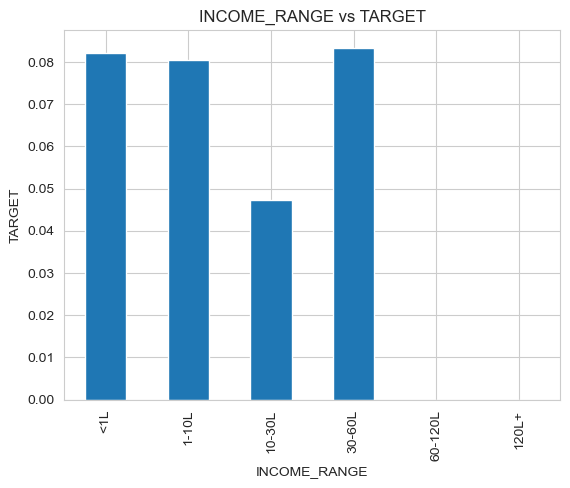

In [557]:
new_df_data.groupby("INCOME_RANGE")["TARGET"].mean().plot.bar()
plt.xlabel("INCOME_RANGE")
plt.ylabel("TARGET")
plt.title("INCOME_RANGE vs TARGET")
plt.show()

#####  Observation:  
- Clients with an annual income of 60 lakhs and above have a target value of 0, indicating that they face less difficulty in making loan payments.


#### AMT_INCOME_TOTAL column


In [558]:
new_df_data["INCOME_RANGE"].value_counts()

1-10L      243563
<1L         63698
10-30L        233
30-60L         12
60-120L         2
120L+           2
Name: INCOME_RANGE, dtype: int64

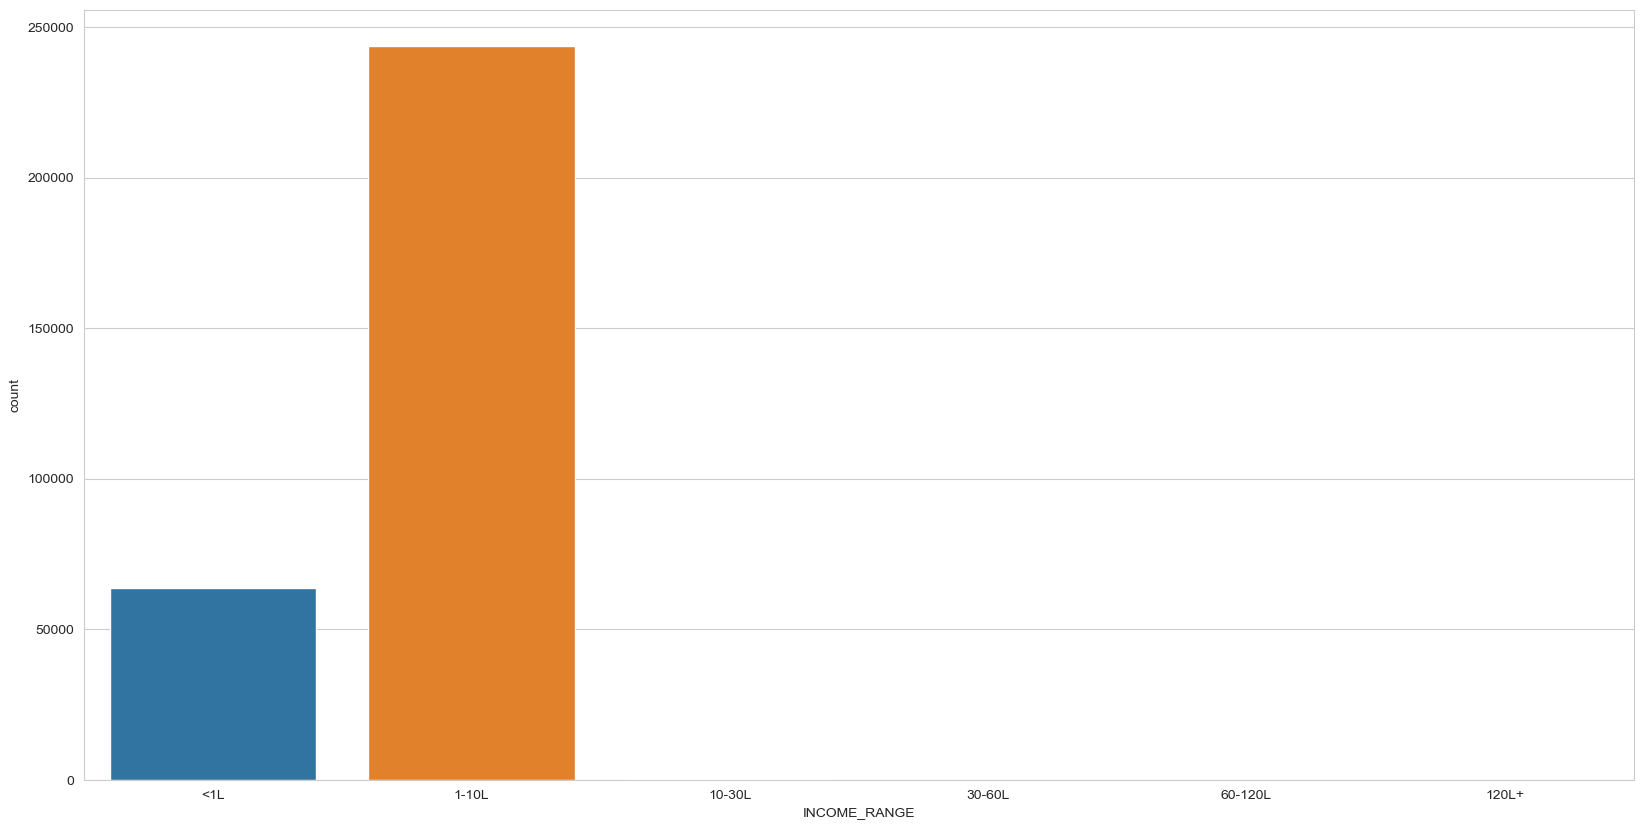

In [559]:
plt.figure(figsize=[20,10])
order = ['<1L', '1-10L', '10-30L', '30-60L', '60-120L', '120L+']
sns.countplot(x=pd.Categorical(new_df_data["INCOME_RANGE"], categories=order, ordered=True))
plt.xlabel("INCOME_RANGE")
plt.show()

##### Observation: mojority of the applicants are having income in the range 1-10Lakhs

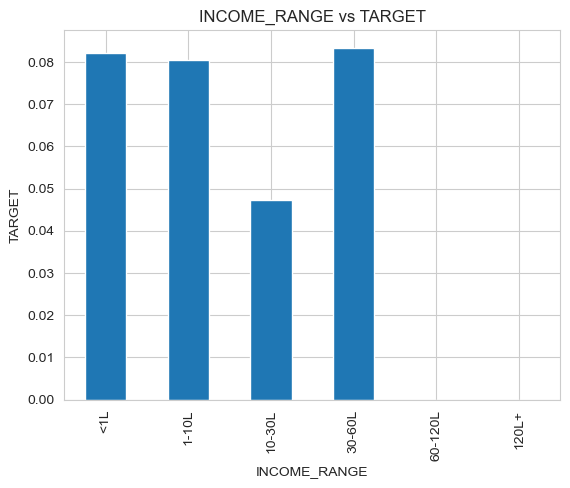

In [560]:
new_df_data.groupby("INCOME_RANGE")["TARGET"].mean().plot.bar()
plt.xlabel("INCOME_RANGE")
plt.ylabel("TARGET")
plt.title("INCOME_RANGE vs TARGET")
plt.show()

#### DAYS_EMPLOYED  column


In [561]:
new_df_data["DAYS_EMPLOYED"].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [562]:
new_df_data["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [563]:
new_df_data[new_df_data['DAYS_EMPLOYED'] > 0] ["DAYS_EMPLOYED"].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [564]:
new_df_data[new_df_data['DAYS_EMPLOYED'] > 0]["OCCUPATION_TYPE"].value_counts()

Pensioner         55350
Unemployed           22
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [565]:
#Days Employed has a positive value 365243 for pensioners and unemployed occupation
#imputing the value 365243 with nan to skip it in our analysis
new_df_data.loc[new_df_data['DAYS_EMPLOYED'] > 0, "DAYS_EMPLOYED"]=np.NAN

In [566]:
#casting negative values to positive values of Days Employed
new_df_data["DAYS_EMPLOYED"]=new_df_data["DAYS_EMPLOYED"].abs()

In [567]:
#sanity check
new_df_data["DAYS_EMPLOYED"].describe()

count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [568]:
#Binning Days Employed into range "<1K", "1K-3K", "3K-6K", "6K-9K", "9K-12K","12K-15K", "15K+"
new_df_data["DAYS_EMPLOYED_RANGE"] = pd.cut(new_df_data["DAYS_EMPLOYED"], bins=[0,1000, 3000,6000,9000,12000,15000, 18000], labels = ["<1K", "1K-3K", "3K-6K", "6K-9K", "9K-12K","12K-15K", "15K+"])


In [569]:
#sanity check
new_df_data["DAYS_EMPLOYED_RANGE"].value_counts()

1K-3K      101179
<1K         82196
3K-6K       49157
6K-9K       13017
9K-12K       4797
12K-15K      1625
15K+          164
Name: DAYS_EMPLOYED_RANGE, dtype: int64

#### OWN_CAR_AGE  column

In [570]:
new_df_data['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [571]:
#Binning age group column into range "<5","5-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90",">90+"
new_df_data["OWN_CAR_AGE_RANGE"] = pd.cut(new_df_data["OWN_CAR_AGE"],bins=[0,5,10,20,30,40,50,60,70,80,90,200], labels = ["<5","5-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90",">90+"])


In [572]:
#Sanity Check
new_df_data["OWN_CAR_AGE_RANGE"].value_counts()

10-20    33221
5-10     29519
<5       26654
20-30     8122
60-70     3337
30-40     1406
40-50      165
50-60       22
>90+         2
70-80        0
80-90        0
Name: OWN_CAR_AGE_RANGE, dtype: int64

In [573]:
new_df_data["ORGANIZATION_TYPE"].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [574]:
#Imputing XNA which indicate information not availaible with Np.nan
new_df_data.loc[new_df_data["ORGANIZATION_TYPE"]== "XNA","ORGANIZATION_TYPE"]=np.NAN

In [575]:
#sanity check
new_df_data["ORGANIZATION_TYPE"].isin(["XNA"]).sum()

0

## Univerate Analysis


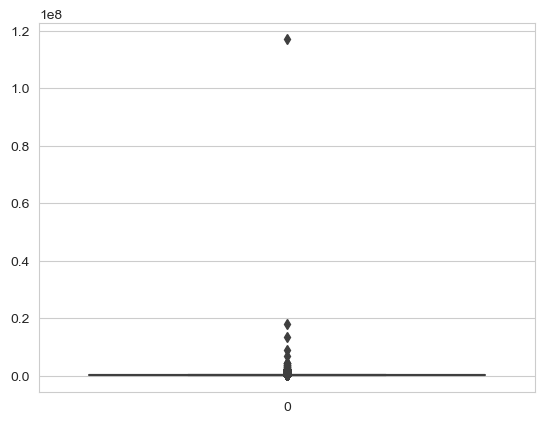

In [576]:
sns.set_style("whitegrid")
sns.boxplot(new_df_data["AMT_INCOME_TOTAL"])
plt.show()

In [577]:
new_df_data["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [578]:
new_df_data[new_df_data["AMT_INCOME_TOTAL"]==new_df_data["AMT_INCOME_TOTAL"].max()]["TARGET"]

12840    1
Name: TARGET, dtype: int64

##### Observation: 
- The data point with a value of 117000000 is considered an outlier due to its extremely high value and a corresponding target value of 1. 
- To maintain data integrity and mitigate any potential impact on the analysis, it has been decided to exclude this particular data point from the dataset.

In [579]:
#Dropping the outlier
new_df_data=new_df_data[~(new_df_data["AMT_INCOME_TOTAL"]==new_df_data["AMT_INCOME_TOTAL"].max())]

In [580]:
#sanity Check
new_df_data["AMT_INCOME_TOTAL"].describe()

count    3.075100e+05
mean     1.684180e+05
std      1.088118e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

#### AMT_ANNUITY column


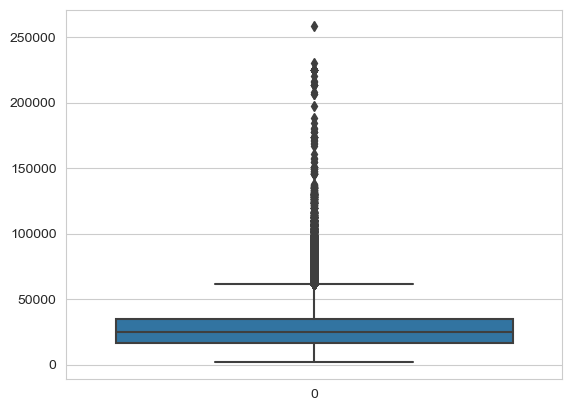

In [581]:
sns.boxplot(new_df_data["AMT_ANNUITY"])
plt.show()

In [582]:
new_df_data["AMT_ANNUITY"].max()

258025.5

##### Observation:
- In the loan annuity column, it has been noticed that the entry with the value 258025.5 stands out as an outlier.


#### AGE_GROUP vs TARGET

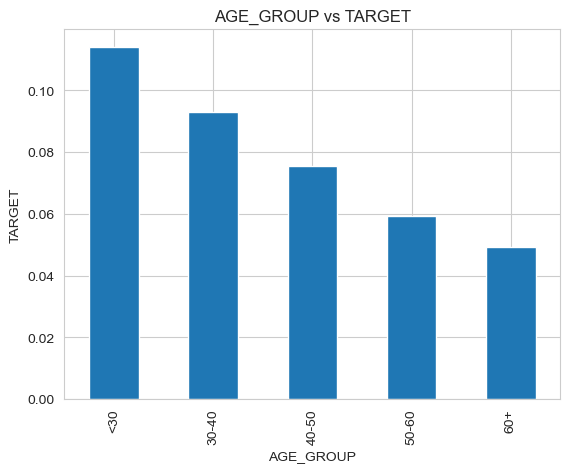

In [583]:
new_df_data.groupby("AGE_GROUP")["TARGET"].mean().plot.bar()
plt.xlabel("AGE_GROUP")
plt.ylabel("TARGET")
plt.title("AGE_GROUP vs TARGET")
plt.show()

#####  Observation:  
- It appears that clients below the age of 30 experience greater challenges in making loan payments.


#### CONTRACT_TYPE vs TARGET

In [584]:
new_df_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AGE_GROUP', 'INCOME_RANGE', 'DAYS_EMPLOYED_RANGE', 'OWN_CAR_AGE_RANGE'], dtype='object')

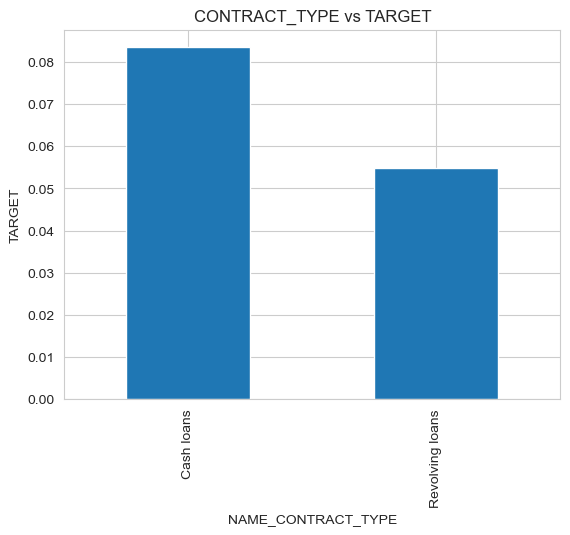

In [585]:
new_df_data.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("TARGET")
plt.title("CONTRACT_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Clients who have taken cash loans experience more challenges in making loan payments.

#### INCOME_TYPE vs TARGET


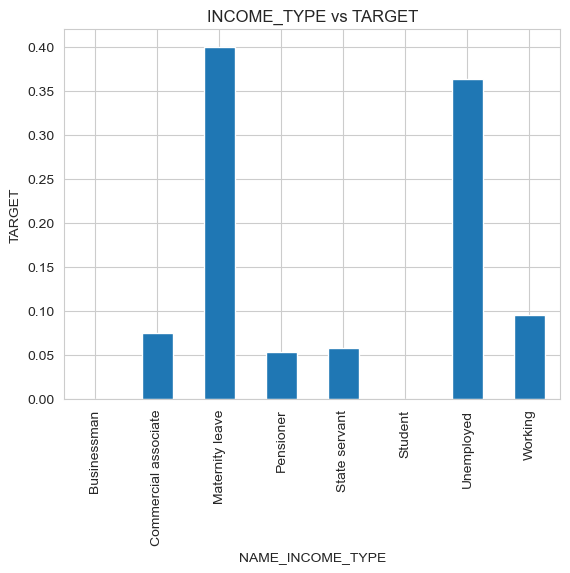

In [586]:
new_df_data.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("TARGET")
plt.title("INCOME_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Clients who are unemployed or on maternity leave experience greater challenges in making loan payments.


#### OCCUPATION_TYPE vs TARGET


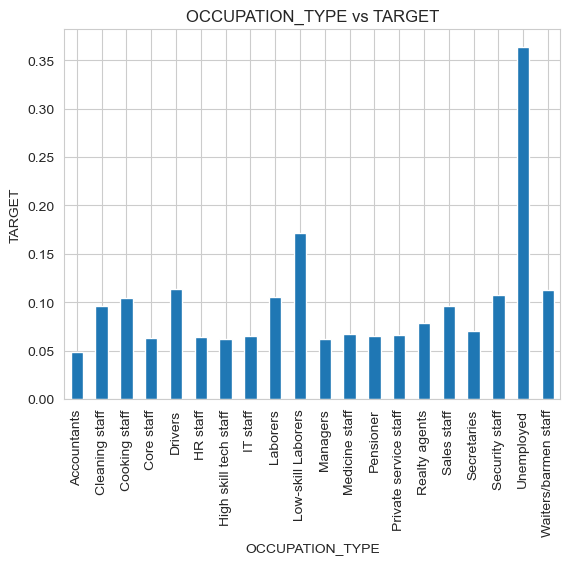

In [587]:
new_df_data.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("TARGET")
plt.title("OCCUPATION_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Individuals who are unemployed or engaged in low-skilled labor face greater challenges in making loan payments.

#### NAME_EDUCATION_TYPE vs TARGET


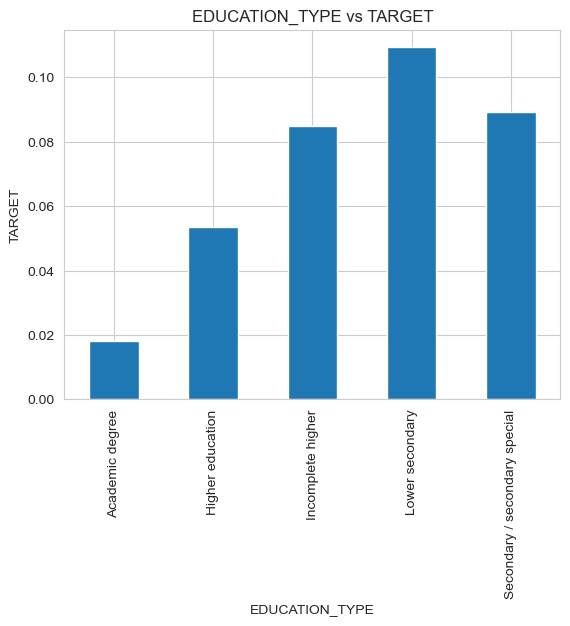

In [588]:
new_df_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("EDUCATION_TYPE")
plt.ylabel("TARGET")
plt.title("EDUCATION_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Clients who have completed education up to the Lower Secondary level face challenges in making loan payments.


#### OWN_CAR_AGE_RANGE vs TARGET 


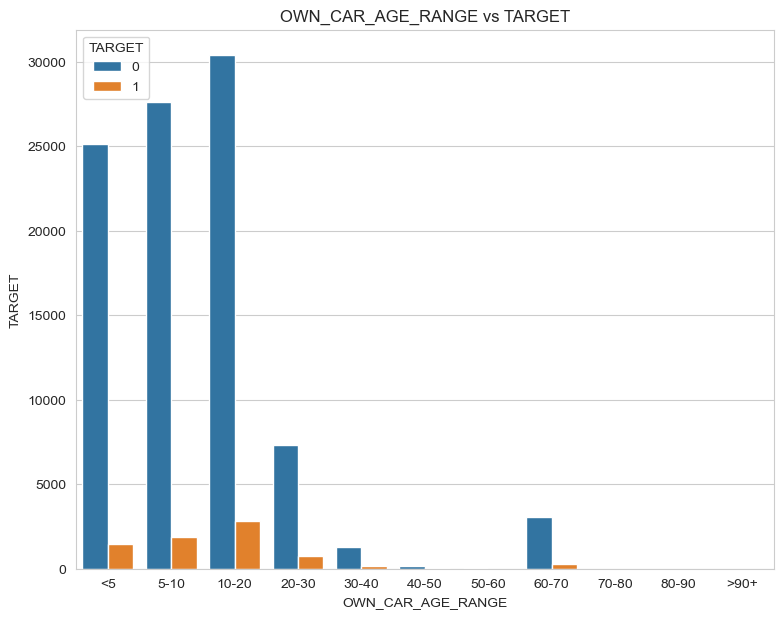

In [589]:
plt.figure(figsize=(9,7))
sns.countplot(x=new_df_data["OWN_CAR_AGE_RANGE"],hue=new_df_data["TARGET"])
plt.xlabel("OWN_CAR_AGE_RANGE")
plt.ylabel("TARGET")
plt.title("OWN_CAR_AGE_RANGE vs TARGET")
plt.show()

#####  Observation: 
- Clients who are under the age of 30 and own a car tend to face difficulties in making loan payments.
#### DAYS_EMPLOYED_RANGE vs TARGET

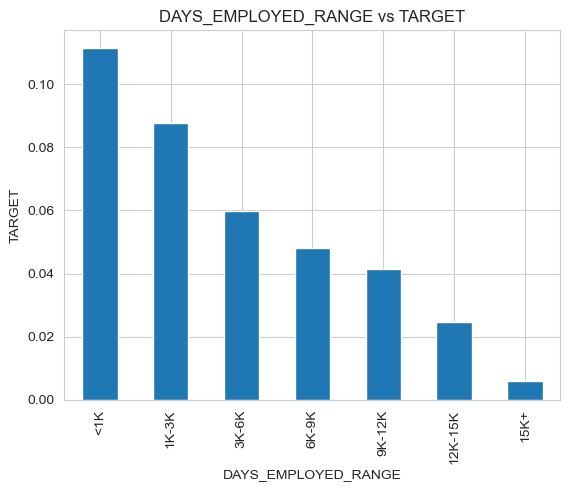

In [590]:
new_df_data.groupby("DAYS_EMPLOYED_RANGE")["TARGET"].mean().plot.bar()
plt.xlabel("DAYS_EMPLOYED_RANGE")
plt.ylabel("TARGET")
plt.title("DAYS_EMPLOYED_RANGE vs TARGET")
plt.show()

#####  Observation: 
- Individuals with a shorter duration of employment or those who have recently been employed face challenges in making loan payments.
#### CODE_GENDER & NAME_CONTRACT_TYPE vs TARGET

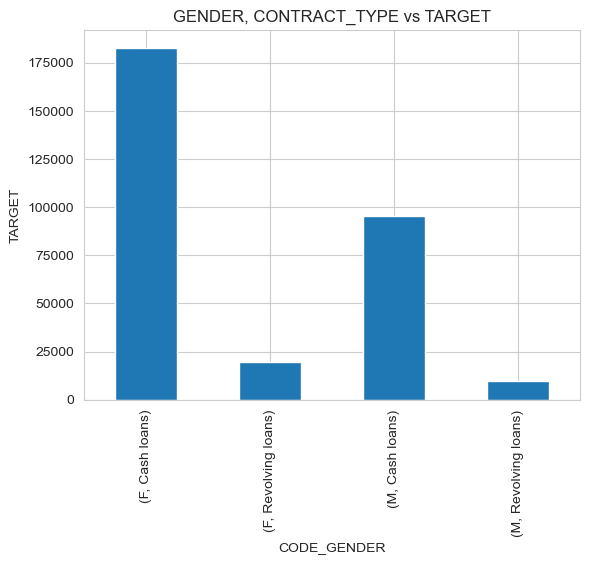

In [591]:
new_df_data.groupby(["CODE_GENDER","NAME_CONTRACT_TYPE"])["TARGET"].count().plot.bar()
plt.xlabel("CODE_GENDER")
plt.ylabel("TARGET")
plt.title("GENDER, CONTRACT_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Female clients experience higher difficulty in making payments for both cash loans and revolving loans.
#### HOUSING_TYPE vs TARGET 


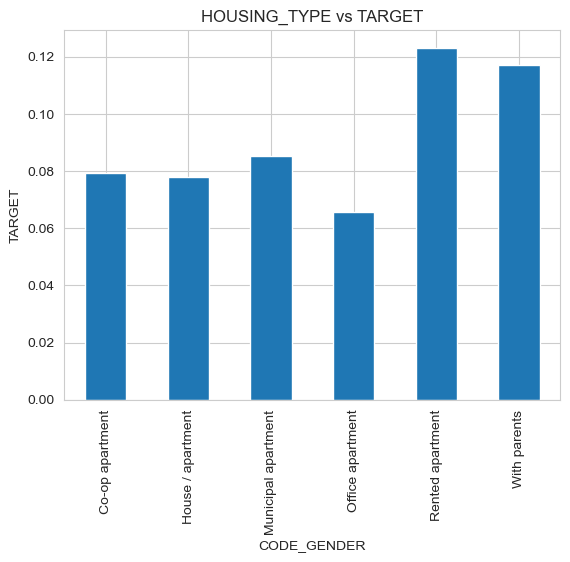

In [592]:
new_df_data.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.xlabel("CODE_GENDER")
plt.ylabel("TARGET")
plt.title("HOUSING_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Clients residing in rented apartments or living with their parents face higher challenges in making loan payments.
## Multi-Variate Analyis
#### CORRELATION OF NUMERIC VARIABLES


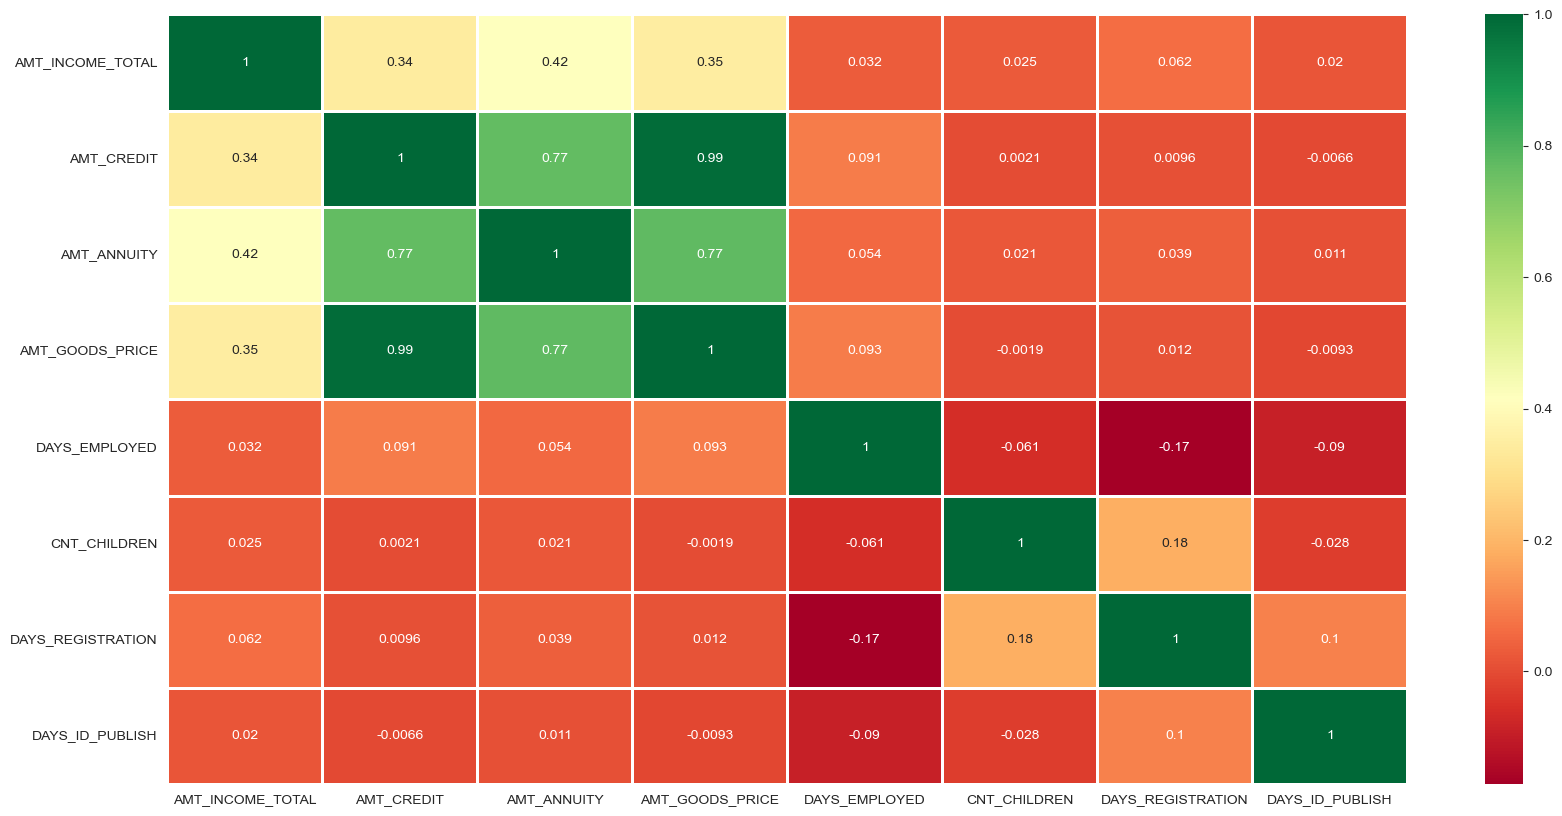

In [593]:
plt.figure(figsize=[20,10])
numeric_corelation=new_df_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr()
sns.heatmap(numeric_corelation,annot=True,cmap="RdYlGn",linewidth=0.9)
plt.show()

#####  Observation: AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY ARE CORRELATED


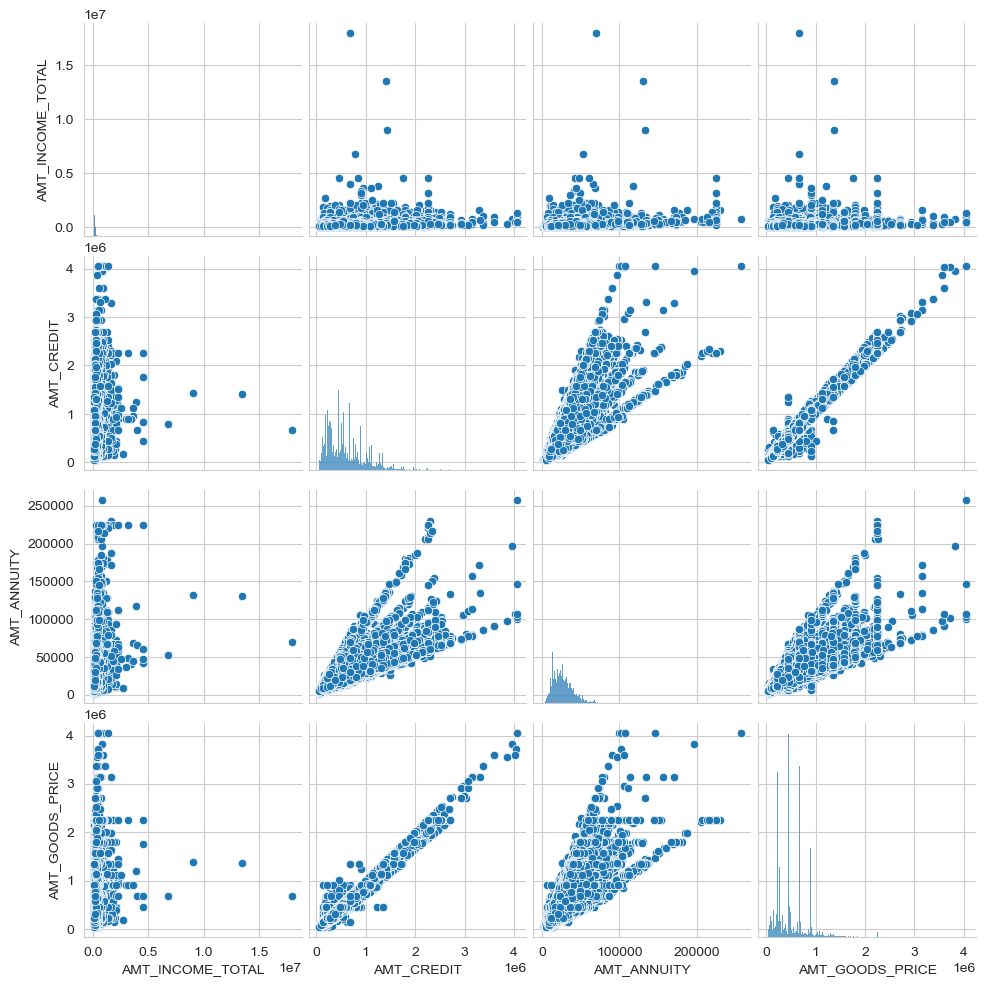

In [594]:
sns.pairplot(new_df_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

#####  Observation: 
- The credit amount and annuity amount tend to increase with higher goods prices.
#### INCOME_TYPE,  GENDER vs TARGET 


<Figure size 1000x2000 with 0 Axes>

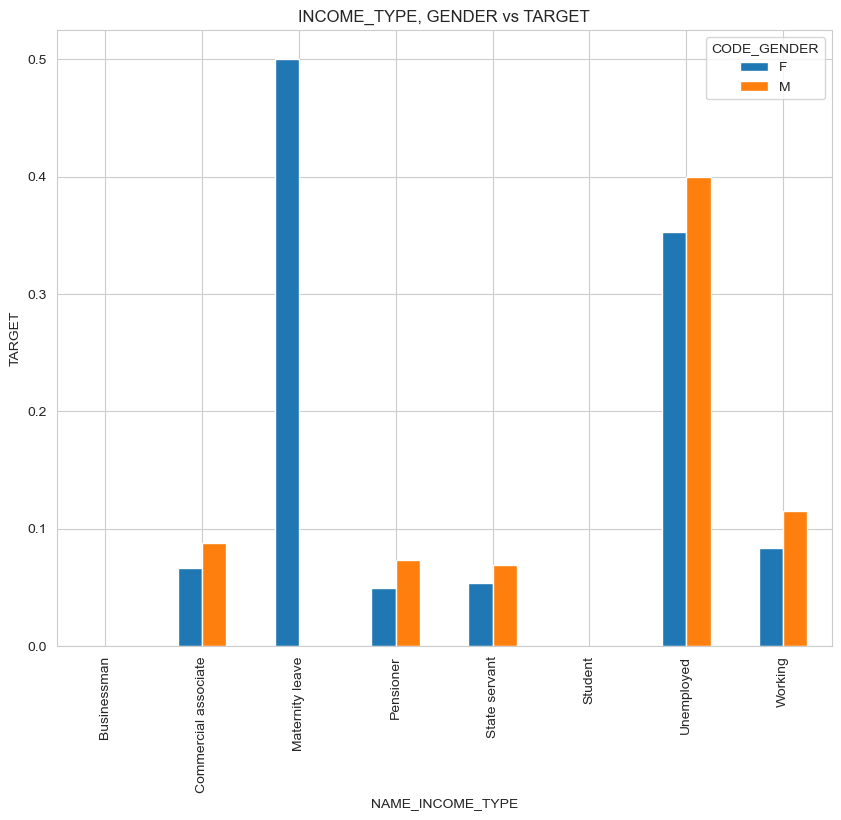

In [595]:
plt.figure(figsize=(10,20))
pd.pivot_table(data=new_df_data,columns="CODE_GENDER",index="NAME_INCOME_TYPE",values="TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("INCOME_TYPE, GENDER vs TARGET")
plt.show()


#####  Observation: 
- Female clients who are on maternity leave or unemployed, as well as male clients in the same situation, are facing challenges in making loan payments.
#### FLAG_OWN_REALTY, INCOME_TYPE vs TARGET


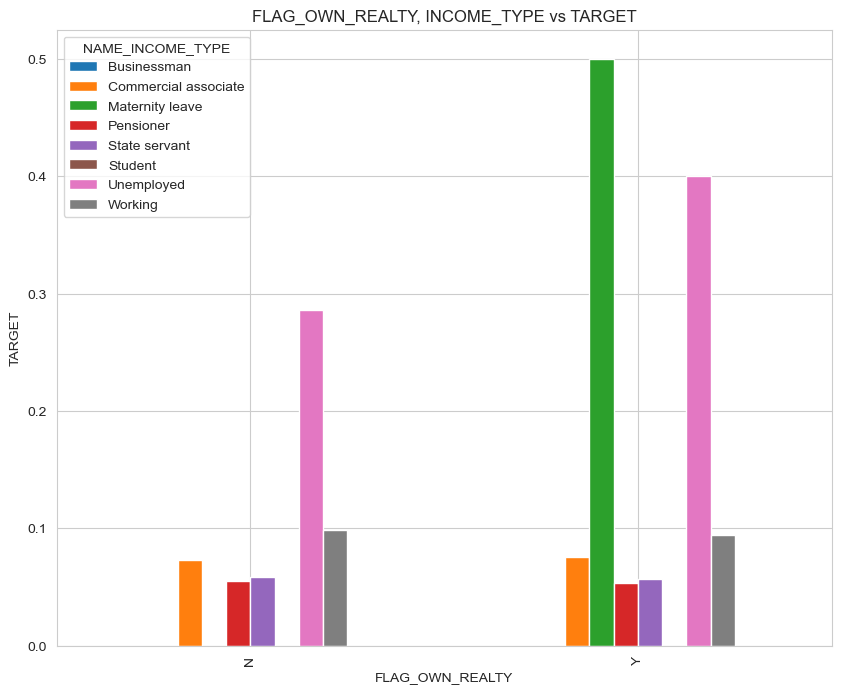

In [596]:
pd.pivot_table(data=new_df_data,columns="NAME_INCOME_TYPE",index="FLAG_OWN_REALTY",values="TARGET").plot.bar(figsize=[10,8])
plt.ylabel("TARGET")
plt.title("FLAG_OWN_REALTY, INCOME_TYPE vs TARGET")
plt.show()

#####  Observation: 
- Clients who are on maternity leave and own realty 
- Unemployed clients, whether or not they own real estate, are experiencing difficulties in making payments.


#### AGE_GROUP, INCOME_TYPE, FLAG_OWN_REALTY vs TARGET


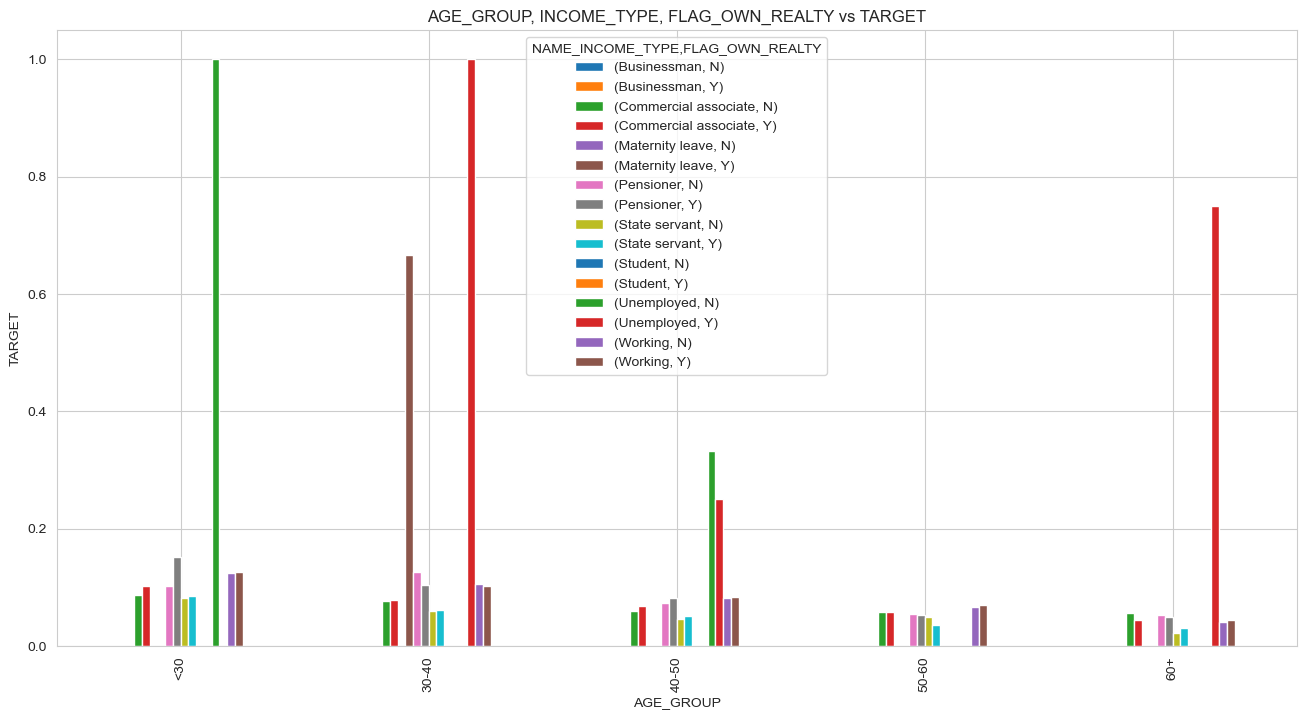

In [597]:
pd.pivot_table(data=new_df_data,columns=["NAME_INCOME_TYPE","FLAG_OWN_REALTY"],index="AGE_GROUP",values="TARGET").plot.bar(figsize=[16,8])
plt.ylabel("TARGET")
plt.title("AGE_GROUP, INCOME_TYPE, FLAG_OWN_REALTY vs TARGET")
plt.show()

#####  Observation: 
- Clients under the age of 30 who are unemployed and do not own real estate are at higher risk.
- Clients between the ages of 30-40 who are unemployed or on maternity leave are facing challenges in making payments.


In [598]:
new_df_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AGE_GROUP', 'INCOME_RANGE', 'DAYS_EMPLOYED_RANGE', 'OWN_CAR_AGE_RANGE'], dtype='object')

#### CODE_GENDER, EDUCATION_TYPE, INCOME_RANGE vs TARGET


<Figure size 1000x2000 with 0 Axes>

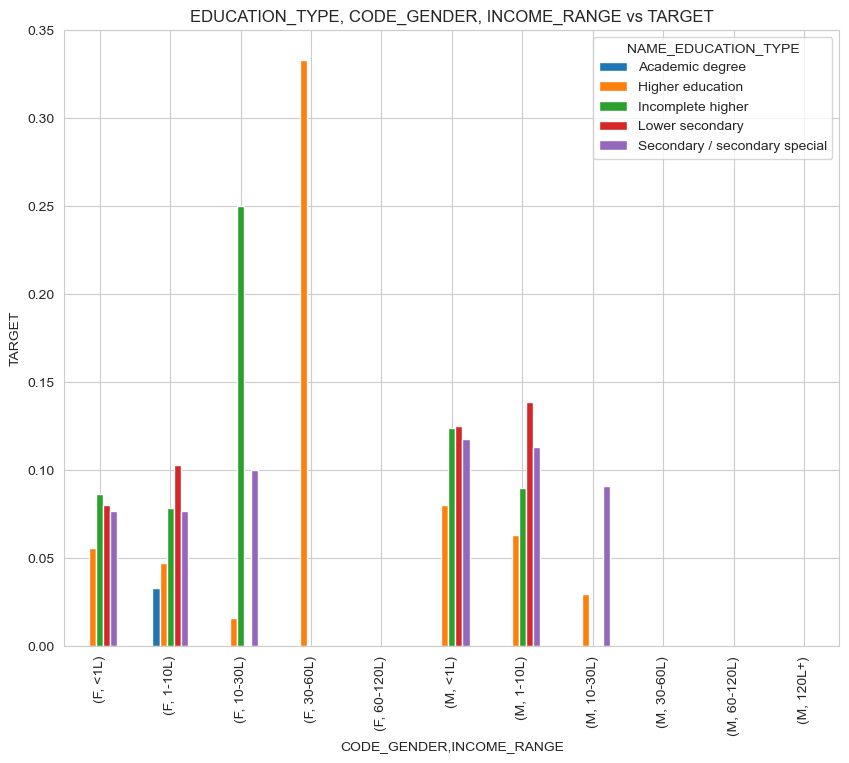

In [599]:
plt.figure(figsize=(10,20))
pd.pivot_table(data=new_df_data,columns="NAME_EDUCATION_TYPE",index=["CODE_GENDER","INCOME_RANGE"],values="TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("EDUCATION_TYPE, CODE_GENDER, INCOME_RANGE vs TARGET")
plt.show()

#####  Observation: 
- Female clients who have attained higher education and fall within the income range of 30-60 lakhs encounter challenges in making loan payments.
- Female clients with incomplete higher education and income ranging from 10-30 lakhs experience difficulties in repayment.
- Male clients with lower secondary education and an income of less than 10 lakhs face issues in meeting their payment obligations.

# Data Analysis on Previous Application data


### Inspecting The Previous Application Dataframe


In [600]:
old_df_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
old_df_data.shape

(1670214, 37)

In [602]:
old_df_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning

In [603]:
# Checking columns with % of null values
old_df_data.isnull().sum()/old_df_data.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [604]:
#Dropping columns with maximum null values
old_df_data.drop(old_df_data.loc[:,"PRODUCT_COMBINATION":"NFLAG_INSURED_ON_APPROVAL"].columns,axis=1,inplace=True)
old_df_data.drop(["RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","AMT_DOWN_PAYMENT","NAME_TYPE_SUITE"],axis=1,inplace=True)

In [605]:
#Dropping non-relevant columns which doesn't help in our analysis
old_df_data.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"],axis=1,inplace=True)

In [606]:
#sanity check
old_df_data.shape

(1670214, 23)

In [607]:
old_df_data.isin(["XNA","XNP"]).sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE          677918
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON                5244
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY            855720
CNT_PAYMENT                          0
NAME_YIELD_GROUP                517215
dtype: int64

In [608]:
# imputing XNA and XNP which means missing value with np.nan
old_df_data.replace(["XNA","XNP"],np.nan,inplace=True)

In [609]:
old_df_data.replace(["XAP"],np.nan,inplace=True)

In [610]:
#sanity check
old_df_data.isin(["XNA","XNP"]).sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
dtype: int64

### Univerate Analysis


#### CONTRACT_STATUS column


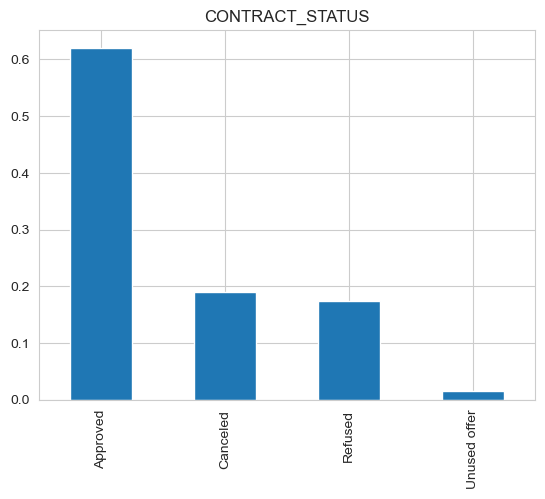

In [611]:
old_df_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.title("CONTRACT_STATUS")
plt.show()

#####  Observation: 
- The majority of loans are approved, while a small percentage of loans remain unused offers.
#### GOODS_CATEGORY column


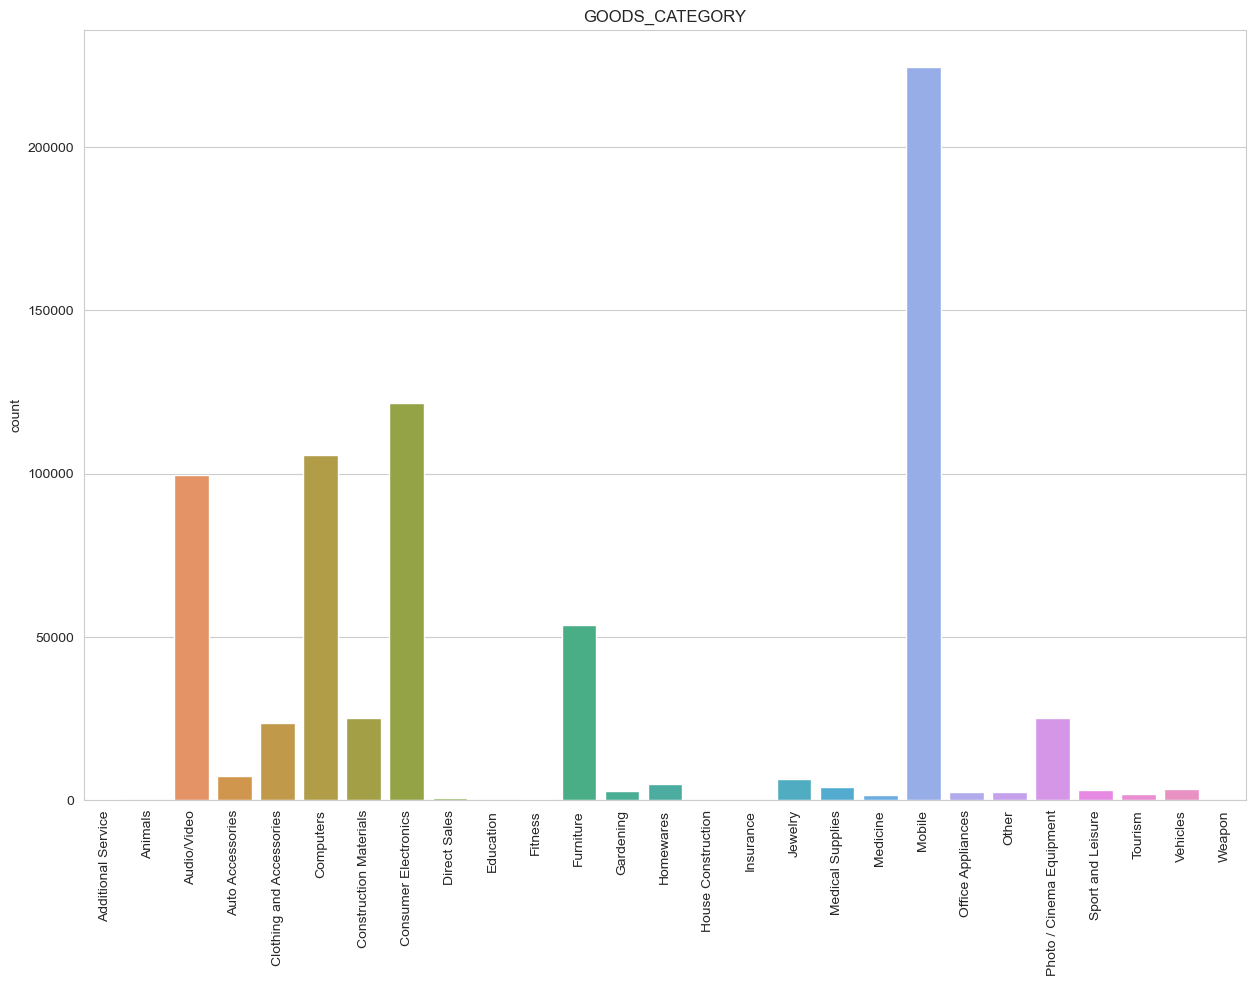

In [612]:
plt.figure(figsize=[15,10])
sns.countplot(x=pd.Categorical(old_df_data["NAME_GOODS_CATEGORY"]))
plt.xticks(rotation=90)
plt.title("GOODS_CATEGORY")
plt.show()

#####  Observation: 
- A significant portion of loans are taken for goods such as mobile phones, consumer electronics, computers, and audio/video equipment.
#### REJECT_REASON column


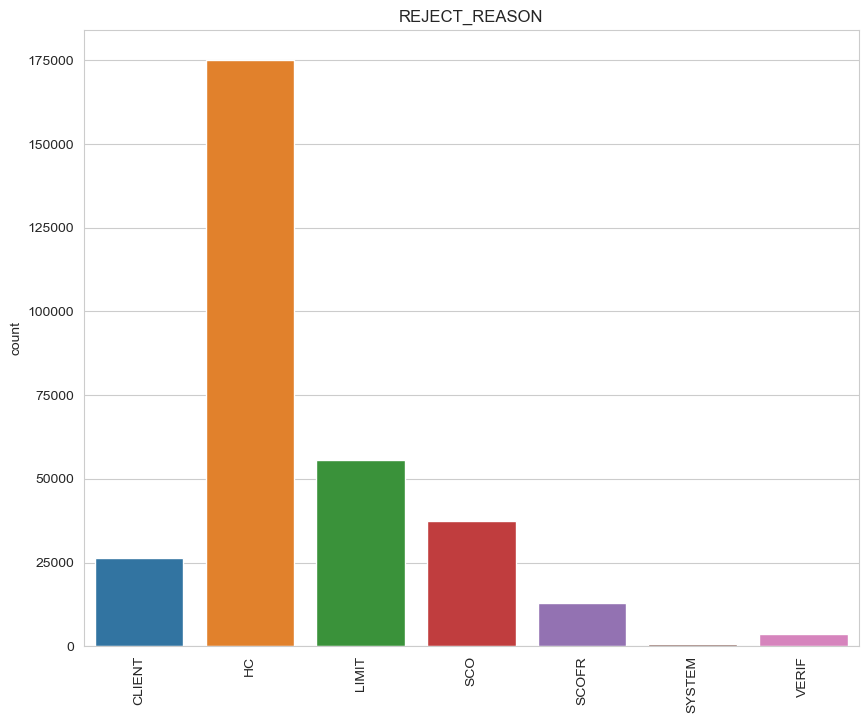

In [613]:
plt.figure(figsize=[10,8])
sns.countplot(x=pd.Categorical(old_df_data["CODE_REJECT_REASON"]))
plt.xticks(rotation=90)
plt.title("REJECT_REASON")
plt.show()

#####  Observation: 
- The primary reason for the majority of rejected applications is "HC"


#### CLIENT_TYPE column


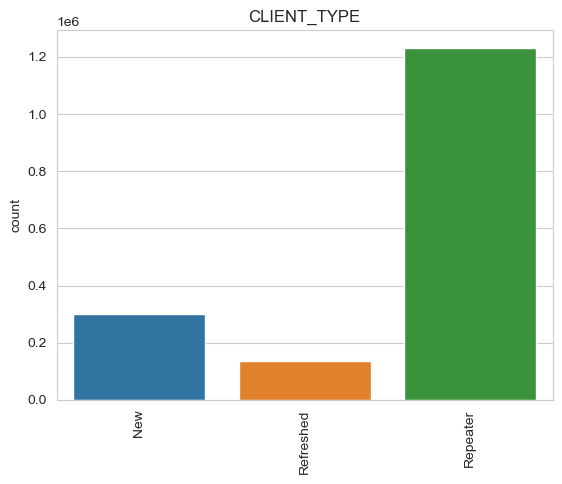

In [614]:

sns.countplot(x=pd.Categorical(old_df_data["NAME_CLIENT_TYPE"]))
plt.xticks(rotation=90)
plt.title("CLIENT_TYPE")
plt.show()

#####  Observation: Most of the Clients are Repeaters
## Merging Application and Previous Application Data Frames


In [615]:
merged_data=pd.merge(new_df_data,old_df_data,how="inner",on="SK_ID_CURR")

In [616]:
merged_data.shape

(1413698, 58)

### Bivariate & Multivariate Analysis

#### CONTRACT_STATUS vs TARGET


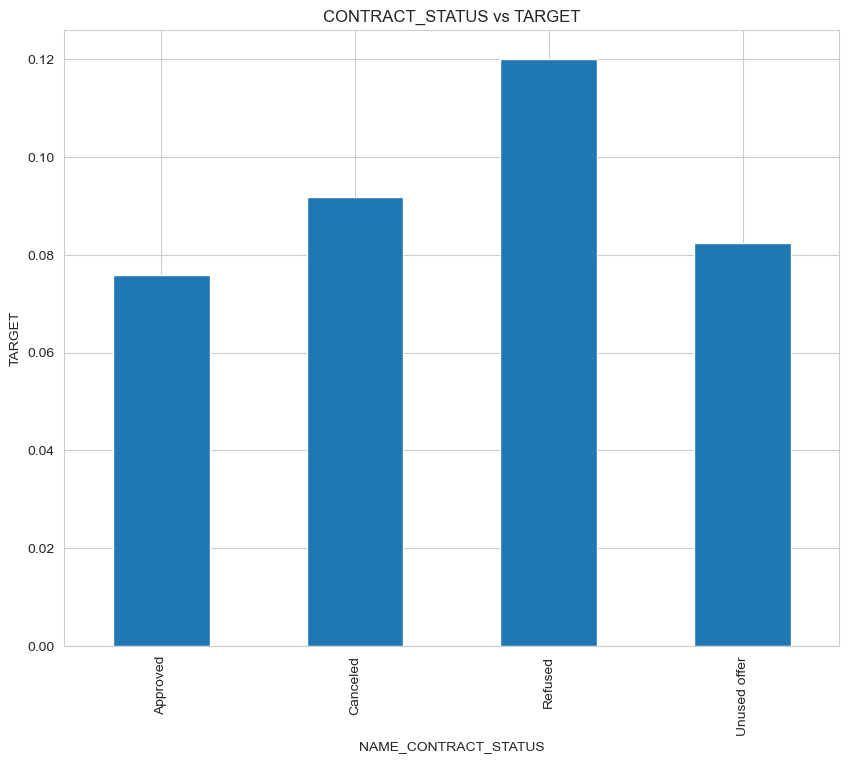

In [617]:
merged_data.groupby(["NAME_CONTRACT_STATUS"])["TARGET"].mean().plot.bar(figsize=[10,8])
plt.ylabel("TARGET")
plt.title("CONTRACT_STATUS vs TARGET")
plt.show()

#####  Observation: 
- Clients who had contracts refused in their previous loan application exhibit the highest percentage of loan-payment difficulties in the current application.
- On the other hand, clients whose previous loan applications were approved have a lower percentage of loan-payment difficulties in the current application.

#### CLIENT_TYPE,CONTRACT_STATUS vs TARGET


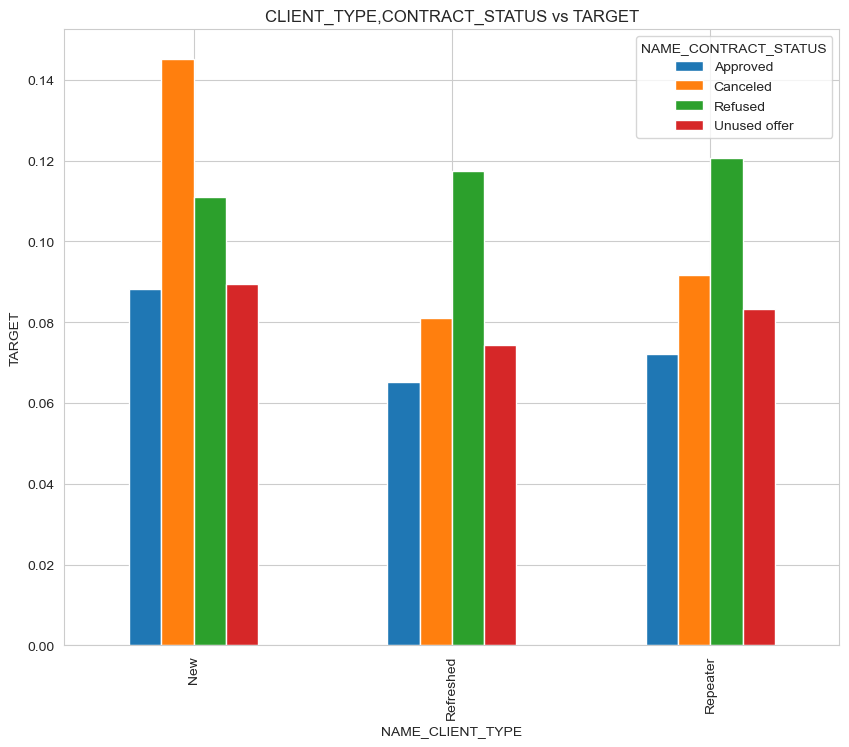

In [618]:
pd.pivot_table(merged_data, index ="NAME_CLIENT_TYPE", columns = "NAME_CONTRACT_STATUS", values= "TARGET").plot.bar(figsize=(10,8))
plt.ylabel("TARGET")
plt.title("CLIENT_TYPE,CONTRACT_STATUS vs TARGET")
plt.show()

#####  Observation: 
- New clients with a higher percentage of previously cancelled and approved applications are found to face difficulties in making loan payments.
- The number of refused requests remains consistent across all client types.

#### LOAN_PURPOSE vs TARGET


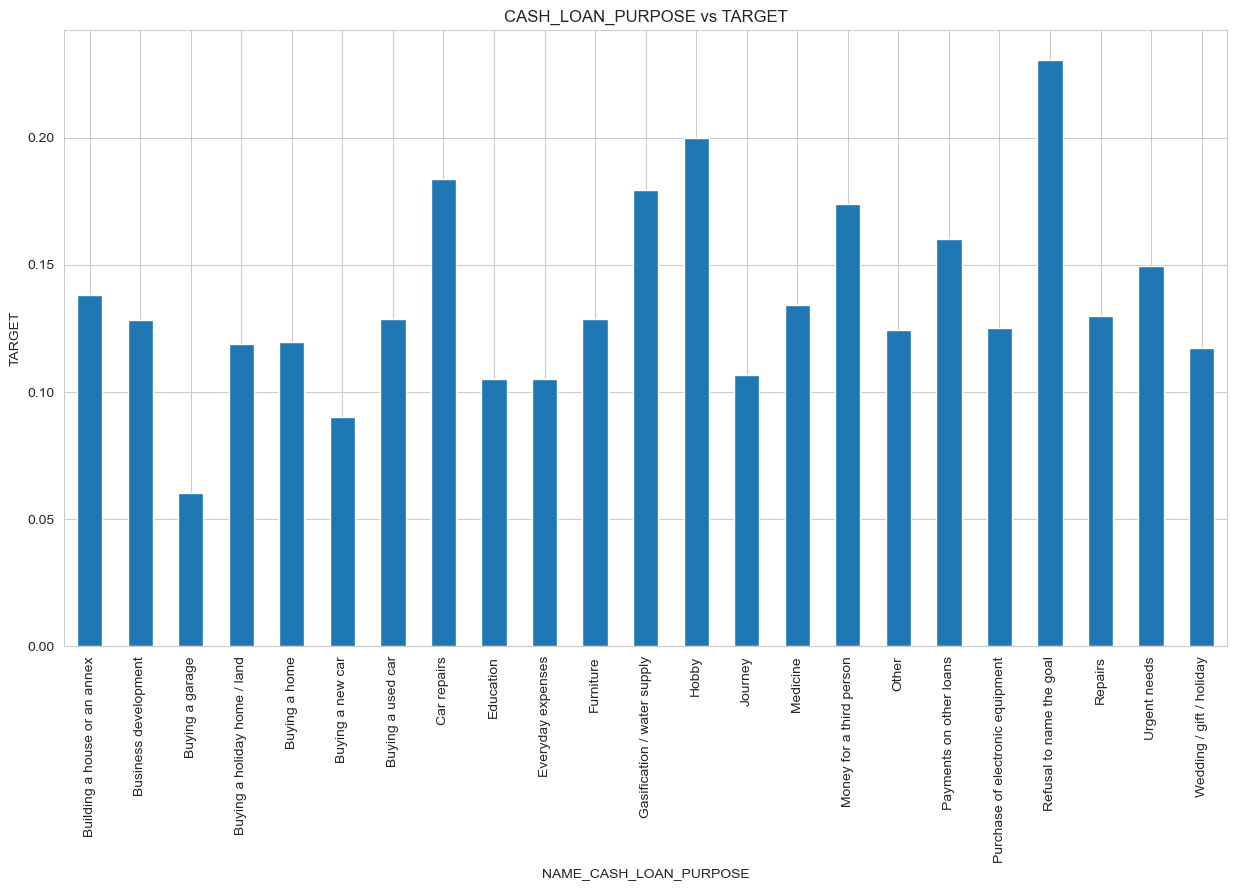

In [619]:
merged_data.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().plot.bar(figsize=(15,8))
plt.ylabel("TARGET")
plt.title("CASH_LOAN_PURPOSE vs TARGET")
plt.show()

#####  Observation: 
- Clients who have specified loan purposes as "Refusal to name the goal," "Hobby," and "Car repairs" tend to encounter challenges in making loan payments.
#### CASH_LOAN_PURPOSE,REJECT_REASON vs TARGET


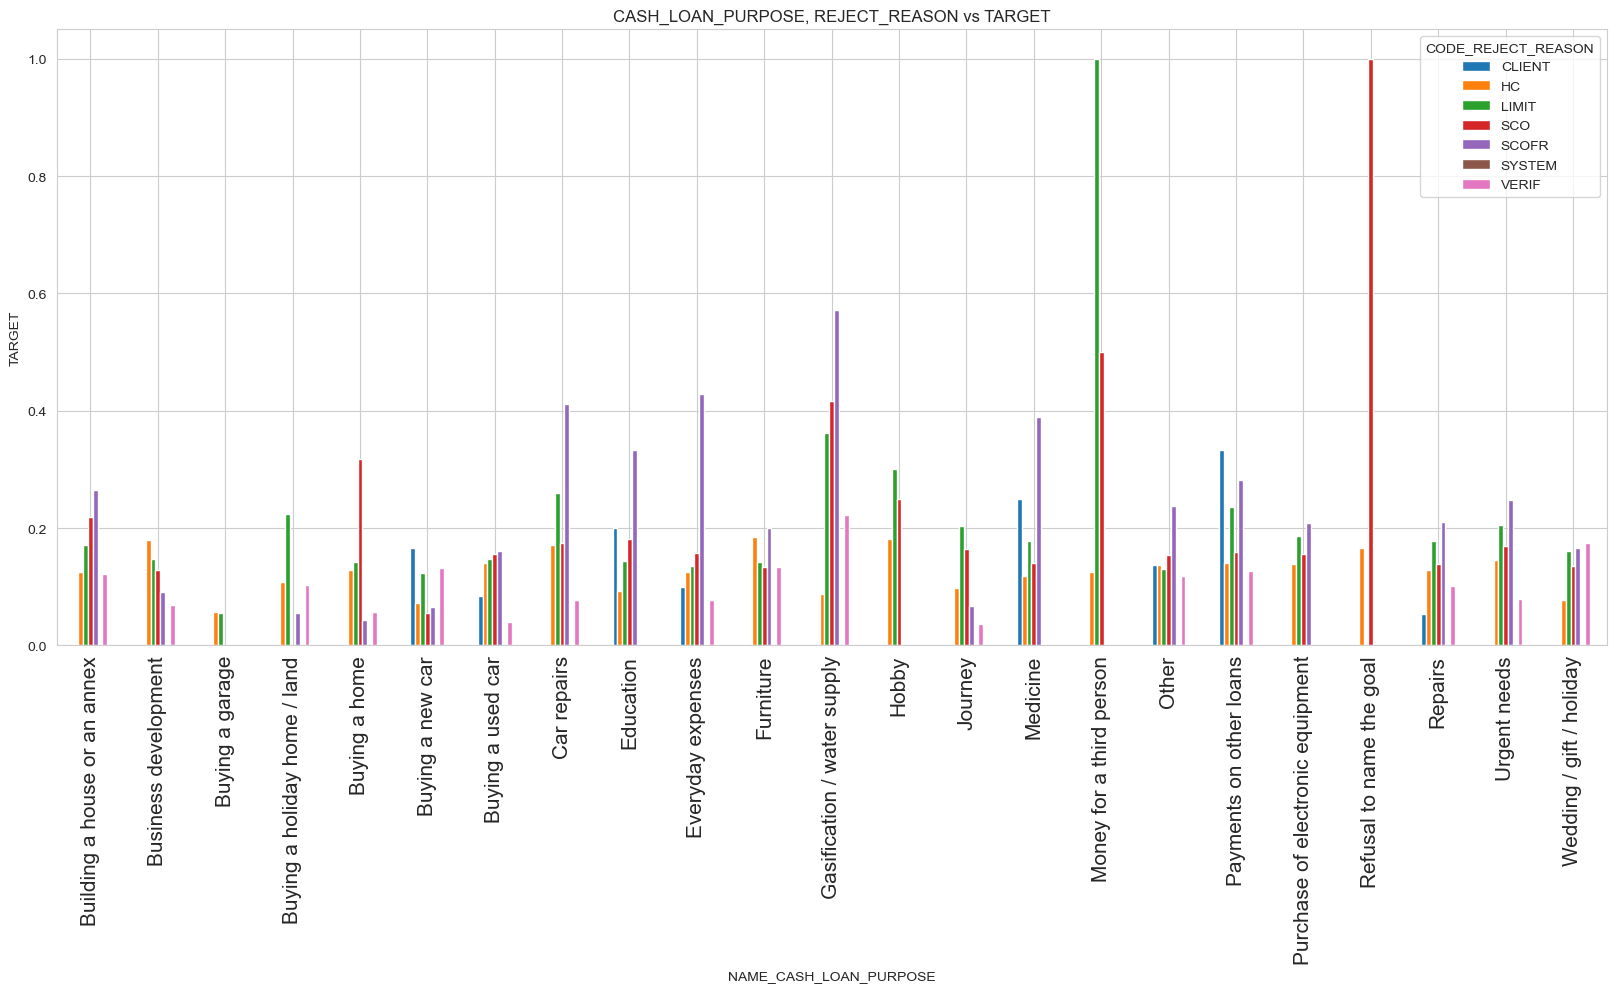

In [620]:
pd.pivot_table(data=merged_data,index="NAME_CASH_LOAN_PURPOSE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("CASH_LOAN_PURPOSE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation: 
- Clients who have stated their loan purposes as "Refusal to name the goal" and have a history of rejected applications for SCO (Single Credit Obligations) with payment difficulties.
- Clients who have stated their loan purposes as "Money for the third person" and have a history of rejected applications for LIMIT (credit limit) with payment difficulties.

#### OCCUPATION_TYPE,REJECT_REASON vs TARGET


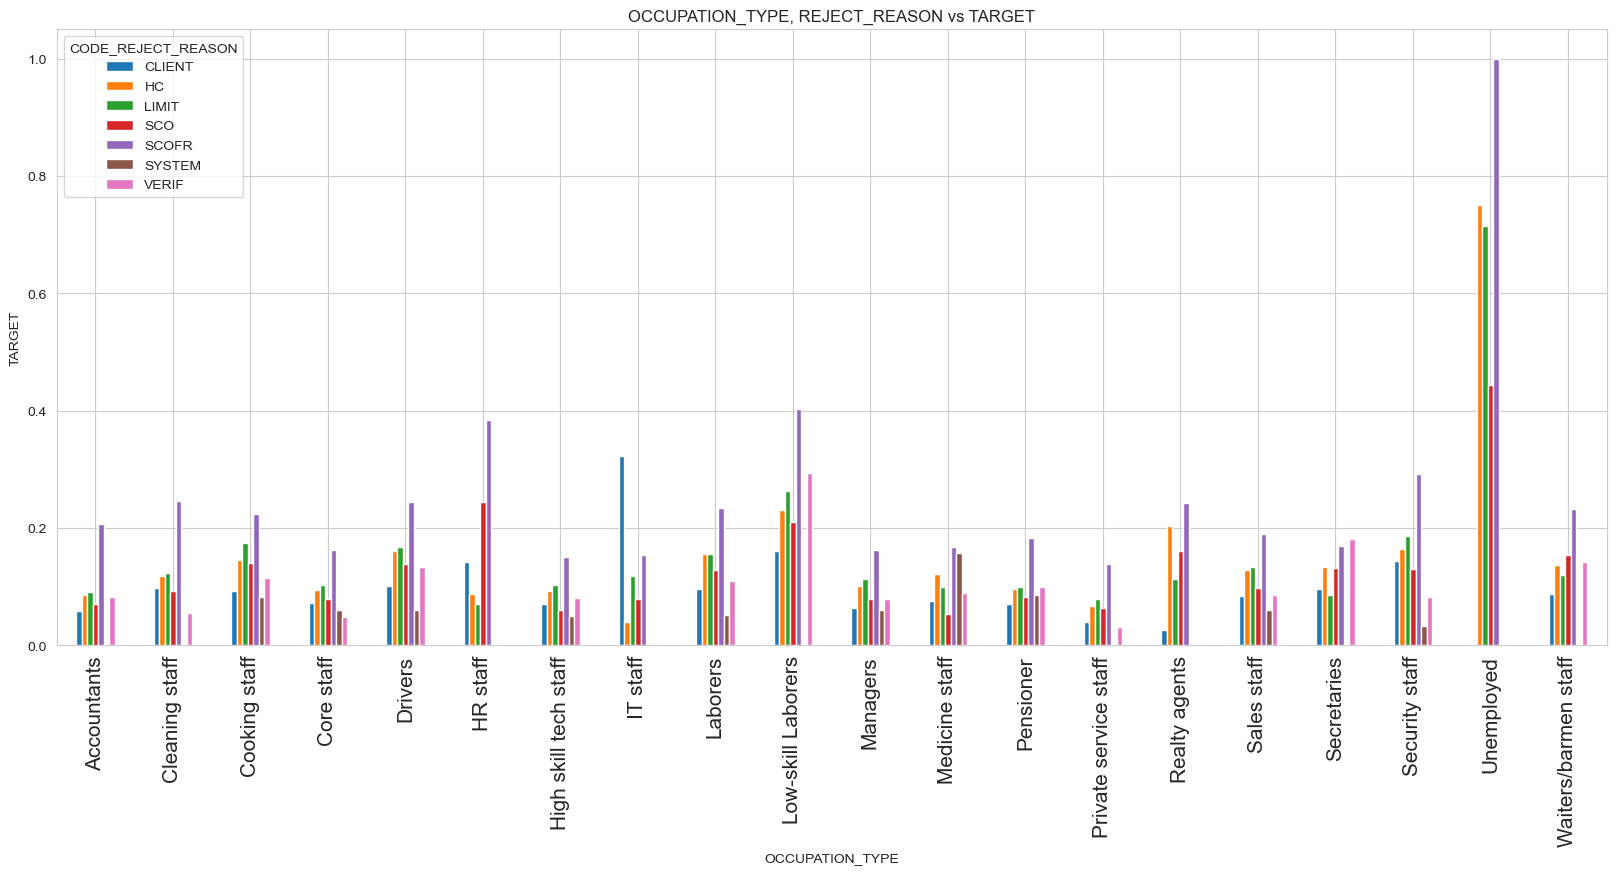

In [621]:
pd.pivot_table(data=merged_data,index="OCCUPATION_TYPE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("OCCUPATION_TYPE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation:
- Clients who are unemployed and have previously had their applications rejected for SCOFR (Source of Funds Review) or HC (High Credit) are experiencing difficulties in making their loan payments.
#### INCOME_RANGE, REJECT_REASON vs TARGET


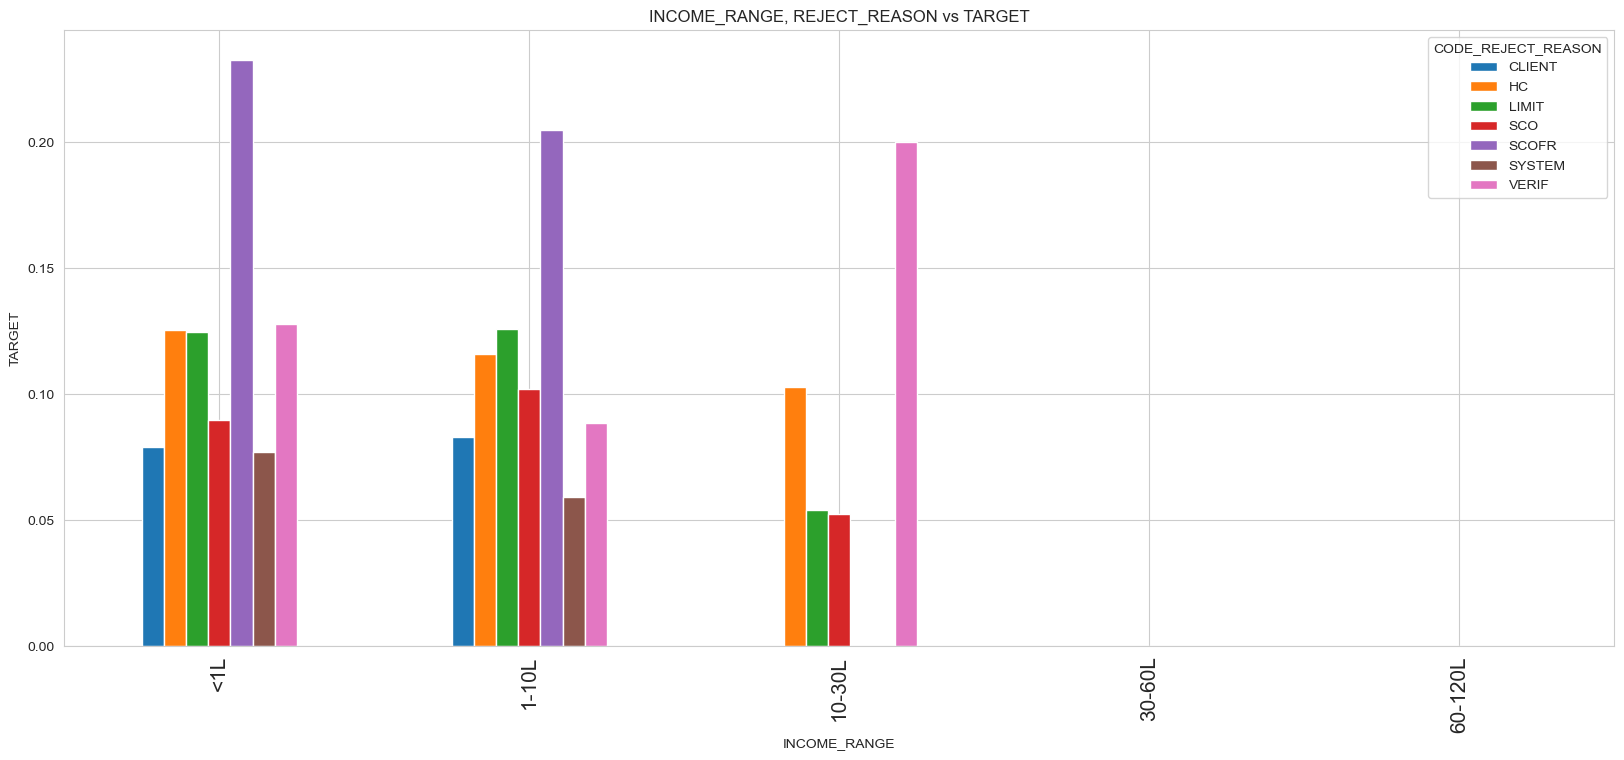

In [622]:
pd.pivot_table(data=merged_data,index="INCOME_RANGE",columns = "CODE_REJECT_REASON",values="TARGET").plot.bar(figsize=[20,8])
plt.xticks(fontsize =15)
plt.ylabel("TARGET")
plt.title("INCOME_RANGE, REJECT_REASON vs TARGET")
plt.show()

#####  Observation: 
- Clients with an income range below 1 lakh who have previously had their application for SCOFR (Specific Credit Obligations for Retail Clients) rejected are experiencing payment difficulties.
- Clients with an income range between 1 lakh and 10 lakh who have previously had their application for SCOFR rejected are facing payment difficulties.
- Clients with an income range between 10 lakh and 30 lakh who have previously had their application for VERIF (Verification of Retail Clients) rejected are encountering payment difficulties.


## Conclusion

### Recommended groups 
- Clients with a positive history of approved applications.
- Clients with advanced education qualifications.
- Clients with higher income levels.
- Senior citizens across all categories.
- Male clients who exhibit more favorable characteristics compared to females.

### Risky groups 
- Clients who have been previously rejected, cancelled, or had unused offers.
- Low-income groups with a history of previous refusals.
- Unemployed clients.
- Younger clients are considered relatively riskier compared to middle-aged clients and senior citizens.
- Clients with lower secondary and secondary education levels.
- Clients whose loan purposes include 'Refusal to name the goal', 'Hobby', 'Money for a third person', and 'Car repairs'.
- Clients with shorter employment durations.